In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
from datetime import date
import seaborn as sns
import calendar

In [3]:
#dateparse = lambda x: datetime.strptime(x, '%d/%m/%Y')
#dat=pd.read_csv("D:/Second_paper_data/COVID-EMDA-master/data_release/spp/dat_kck_2019_2020_intra_weekwork_month_group.csv")
#dat=pd.read_csv("D:/Second_paper_data/COVID-EMDA-master/data_release/caiso/dat_la_2019_2020_intra_weekwork_month_group.csv")
#dat=pd.read_csv("D:/Second_paper_data/COVID-EMDA-master/data_release/ercot/dat_houston_2019_2020_intra_weekwork_month_group.csv")
dat=pd.read_csv("D:/Second_paper_data/COVID-EMDA-master/data_release/isone/dat_boston_2019_2020_intra_weekwork_month_group.csv")
#dat=pd.read_csv("D:/Second_paper_data/COVID-EMDA-master/data_release/nyiso/dat_nyc_2019_2020_intra_weekwork_month_group.csv")
#dat=pd.read_csv("D:/Second_paper_data/COVID-EMDA-master/data_release/pjm/dat_chicago_2019_2020_intra_weekwork_month_group.csv")
#dat=pd.read_csv("D:/Second_paper_data/COVID-EMDA-master/data_release/pjm/dat_phila_2019_2020_intra_weekwork_month_group.csv")


In [32]:
dat.head()

,Unnamed: 0,month,week_work,date,X00.00,X01.00,X02.00,X03.00,X04.00,X05.00,...,X17.00,X18.00,X19.00,X20.00,X21.00,X22.00,X23.00,total_load,week,year
0,1,1,weekday,2019-01-16,10891.604348,10559.291304,10352.617391,10241.10000,10242.295652,10497.530435,...,12812.813043,13280.547826,13183.626087,12991.452174,12726.178261,12288.943478,11667.286957,288076.456522,NaN,2019
1,2,1,weekend,2019-01-16,10651.725000,10283.812500,10074.775000,9915.26250,9884.687500,9938.250000,...,11317.362500,11929.425000,11944.212500,11836.300000,11650.125000,11356.150000,10914.287500,260611.200000,NaN,2019
2,3,2,weekday,2019-02-15,10817.130000,10497.245000,10315.930000,10217.21000,10232.305000,10508.610000,...,12361.425000,12793.495000,12921.040000,12769.425000,12514.860000,12107.845000,11490.190000,285055.595000,NaN,2019
3,4,2,weekend,2019-02-13,10822.237500,10441.725000,10181.175000,10022.80000,9966.862500,10005.712500,...,11014.800000,11516.587500,11690.275000,11577.275000,11400.812500,11116.350000,10691.762500,259694.275000,NaN,2019
4,5,3,weekday,2019-03-15,10094.242857,9758.957143,9558.138095,9461.67619,9479.366667,9735.928571,...,11193.009524,11258.014286,11382.642857,11614.171429,11496.952381,11140.566667,10590.719048,263291.438095,NaN,2019


D:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

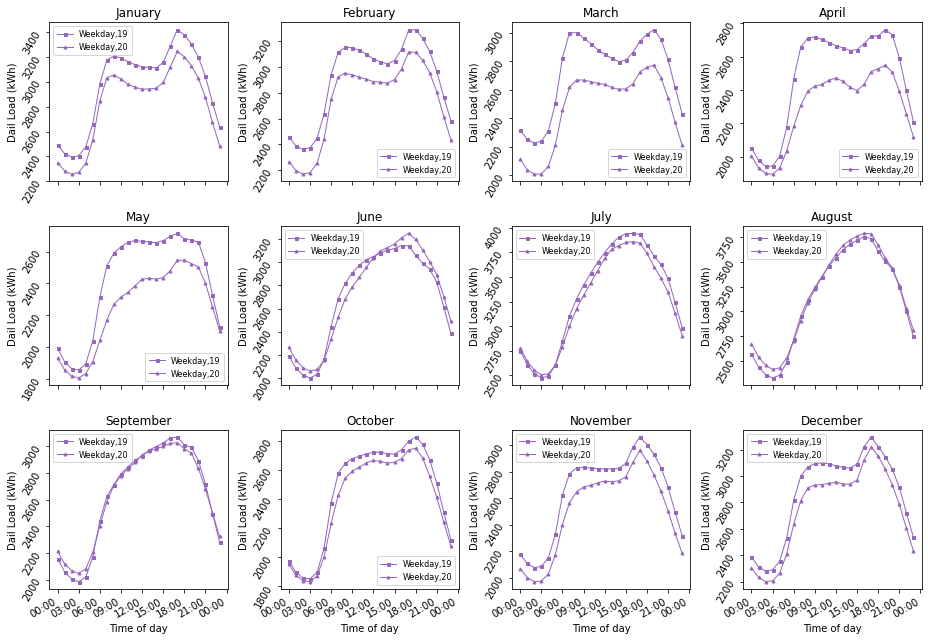

In [4]:
#dat['year'] = dat['date'].dt.year
colors = sns.color_palette()
c1, c2, c3, c4, c5, c6,c7,c8,c9,c10= colors[0], colors[1], colors[2], colors[3], colors[4], colors[5],colors[6],colors[7],colors[8],colors[9]
titles=['January','February','March','April','May','June','July','August','September','October','November','December']
labels=[1,2,3,4,5,6,7,8,9,10,11,12]
idx=pd.date_range("2019-01-01 00:00", "2019-01-01 23:30", freq = "60min")
#fig, ax = plt.subplots(nrows=3, ncols=2)
#fig.set_size_inches(20,15)
hours = mdates.HourLocator(interval = 3)
h_fmt = mdates.DateFormatter('%H:%M')
fig = plt.figure()
fig.set_size_inches(13,9)
for c,num in zip(labels, range(1,13)):
    df=dat[dat['month']==c]
    dat20191=df[df['year']==2019]
    dat20201=df[df['year']==2020]
    dat20192=dat20191.T
    dat20202=dat20201.T
    dat20192.columns=['Weekday','Weekend']
    dat20202.columns=['Weekday','Weekend']
    dat20193=dat20192.iloc[4:28,:]
    dat20193['Time']=idx
    dat20203=dat20202.iloc[4:28,:]
    dat20203['Time']=idx
    
    ax = fig.add_subplot(3,4,num)
    ax.plot(dat20193['Time'], dat20193['Weekday'], linewidth = 1,marker='s',c=c5,markersize=3,label="Weekday,19")
    #ax.plot(dat20193['Time'], dat20193['Weekend'], linewidth = 1,marker='s',c=c10,markersize=3,label="Weekend,19")
    
    ax.plot(dat20203['Time'], dat20203['Weekday'], linewidth = 1,marker='^',c=c5,markersize=3,label="Weekday,20")
    #ax.plot(dat20203['Time'], dat20203['Weekend'], linewidth = 1,marker='^',c=c10,markersize=3,label="Weekend,20")
    
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(h_fmt)
    ax.legend( loc = 'best',prop={ 'size':8})
    #ax.legend( loc = 'best')
    ax.set_title(titles[c-1])
    ax.tick_params(labelrotation=60)
    fig.autofmt_xdate()
    plt.xlabel('Time of day',fontdict={'size':10})
    plt.ylabel('Dail Load (kWh)',fontsize=10)
    #ax.set_ylim(1150,3200) #kck
    #ax.set_ylim(2000,5100) #la
    #ax.set_ylim(1600,4100) #houston
    #ax.set_ylim(3500,10000) #nyc
    #ax.set_ylim(7000,17500) #chicago
    #ax.set_ylim(2700,7500) #phila
    
    
#fig.suptitle('Intra-day electricity usage in Las',fontsize=18)
#plt.legend( loc = 'best',prop={ 'size':7})
plt.tight_layout()
#fig.subplots_adjust(top=0.95)
plt.show()

D:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Program Files\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

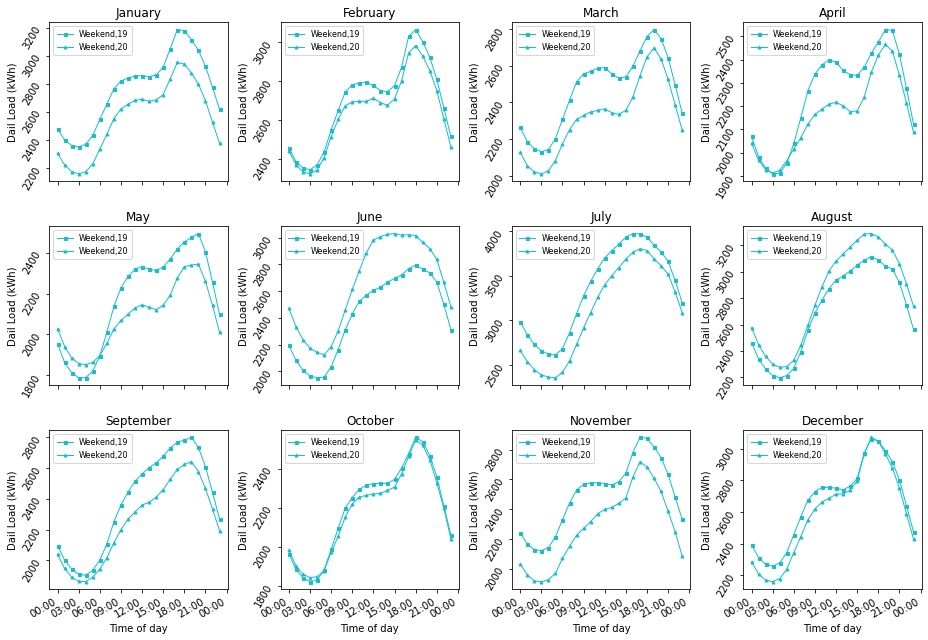

In [5]:
#dat['year'] = dat['date'].dt.year
colors = sns.color_palette()
c1, c2, c3, c4, c5, c6,c7,c8,c9,c10= colors[0], colors[1], colors[2], colors[3], colors[4], colors[5],colors[6],colors[7],colors[8],colors[9]
titles=['January','February','March','April','May','June','July','August','September','October','November','December']
labels=[1,2,3,4,5,6,7,8,9,10,11,12]
idx=pd.date_range("2019-01-01 00:00", "2019-01-01 23:30", freq = "60min")
#fig, ax = plt.subplots(nrows=3, ncols=2)
#fig.set_size_inches(20,15)
hours = mdates.HourLocator(interval = 3)
h_fmt = mdates.DateFormatter('%H:%M')
fig = plt.figure()
fig.set_size_inches(13,9)
for c,num in zip(labels, range(1,13)):
    df=dat[dat['month']==c]
    dat20191=df[df['year']==2019]
    dat20201=df[df['year']==2020]
    dat20192=dat20191.T
    dat20202=dat20201.T
    dat20192.columns=['Weekday','Weekend']
    dat20202.columns=['Weekday','Weekend']
    dat20193=dat20192.iloc[4:28,:]
    dat20193['Time']=idx
    dat20203=dat20202.iloc[4:28,:]
    dat20203['Time']=idx
    
    ax = fig.add_subplot(3,4,num)
    #ax.plot(dat20193['Time'], dat20193['Weekday'], linewidth = 1,marker='s',c=c5,markersize=3,label="Weekday,19")
    ax.plot(dat20193['Time'], dat20193['Weekend'], linewidth = 1,marker='s',c=c10,markersize=3,label="Weekend,19")
    
    #ax.plot(dat20203['Time'], dat20203['Weekday'], linewidth = 1,marker='^',c=c5,markersize=3,label="Weekday,20")
    ax.plot(dat20203['Time'], dat20203['Weekend'], linewidth = 1,marker='^',c=c10,markersize=3,label="Weekend,20")
    
    ax.xaxis.set_major_locator(hours)
    ax.xaxis.set_major_formatter(h_fmt)
    ax.legend( loc = 'best',prop={ 'size':8})
    #ax.legend( loc = 'best')
    ax.set_title(titles[c-1])
    ax.tick_params(labelrotation=60)
    fig.autofmt_xdate()
    plt.xlabel('Time of day',fontdict={'size':10})
    plt.ylabel('Dail Load (kWh)',fontsize=10)
    #ax.set_ylim(1150,3200) #kck
    #ax.set_ylim(2000,5100) #la
    #ax.set_ylim(1600,4100) #houston
    #ax.set_ylim(3500,10000) #nyc
    #ax.set_ylim(7000,17500) #chicago
    #ax.set_ylim(2700,7500) #phila
    
    
#fig.suptitle('Intra-day electricity usage in Las',fontsize=18)
#plt.legend( loc = 'best',prop={ 'size':7})
plt.tight_layout()
#fig.subplots_adjust(top=0.95)
plt.show()